In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, re, datetime, random, gzip, json, copy
import tqdm
import pandas as pd
import numpy as np
import glob
from pathlib import Path
from itertools import accumulate
import argparse
from time import time
from math import ceil
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.utils import class_weight

PROJ_PATH = Path(os.path.join(re.sub("/TS-IDS.*$", '', os.getcwd()), 'TS-IDS'))
print(f'PROJ_PATH={PROJ_PATH}')
sys.path.insert(1, str(PROJ_PATH))
sys.path.insert(1, str(PROJ_PATH/'src'))
import utils

%matplotlib inline

/home/hoang/miniconda2/envs/iot/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


PROJ_PATH=/home/hoang/github/TS-IDS


In [2]:
def read_output(ds_file, pred_path):
    # label mapping
    g_data = pd.read_pickle(ds_file)
    label2idx = g_data['label2idx']
    idx2label = {j:i for i,j in label2idx.items()}
    # ouput df
    df = pd.read_csv(pred_path)
    prob_cnames = [c for c in df.columns if c.startswith('probs')]
    df['pred'] = df[prob_cnames].values.argmax(axis=1)
    df['True label'] = df['gts'].map(idx2label)
    df['Predicted label'] = df['pred'].map(idx2label)
    return df

def calc_auc(gts, probs, avg_type='macro', binary=False):
    if binary:
        auc = roc_auc_score(gts, preds)
    else: 
        auc = roc_auc_score(
            gts, 
            probs, 
            average=avg_type, 
            multi_class='ovo', 
        )
    return auc

def calc_eval(gts, preds, binary):
    acc = accuracy_score(gts, preds)
    auc = calc_auc(gts, probs, binary=binary)
    precision_macro = precision_score(gts, preds, average='macro')
    precision_micro = precision_score(gts, preds, average='micro')
    recall_macro = recall_score(gts, preds, average='macro')
    recall_micro = recall_score(gts, preds, average='micro')
    f1_macro = f1_score(gts, preds, average='macro', zero_division=0)
    f1_micro = f1_score(gts, preds, average='micro', zero_division=0)
    return acc, auc, precision_macro, precision_micro, recall_macro, recall_micro, f1_macro, f1_micro

def plot_confusion_matrix(df_test):
    # https://seaborn.pydata.org/tutorial/color_palettes.html
    fontsize = 14
    fig, ax = plt.subplots(figsize=(10,7))
    tdf = df_test.pivot_table(
        index='True label', columns='Predicted label', values='probs_0', aggfunc='count', fill_value=0.0)
    
    ## Handle missing cols
    missing_cols = set(tdf.index) - set(tdf.columns)
    for col in missing_cols:
        tdf[col] = [0] * tdf.shape[0]
    tdf = tdf.reindex(sorted(tdf.columns), axis=1)
    tdf = tdf.sort_index()
    
    g = sns.heatmap(
        tdf, ax=ax, annot=True, fmt=".0f", cmap="flare", linewidth=.5, 
        xticklabels=tdf.columns, yticklabels=tdf.columns)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=fontsize)
    g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=fontsize)
    g.set_xlabel(g.get_xlabel(), fontsize=fontsize)
    g.set_ylabel(g.get_ylabel(), fontsize=fontsize)
    plt.show()

xgb
nf_bot_binary


/tmp/ipykernel_1275812/2359972098.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
/tmp/ipykernel_1275812/2359972098.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})


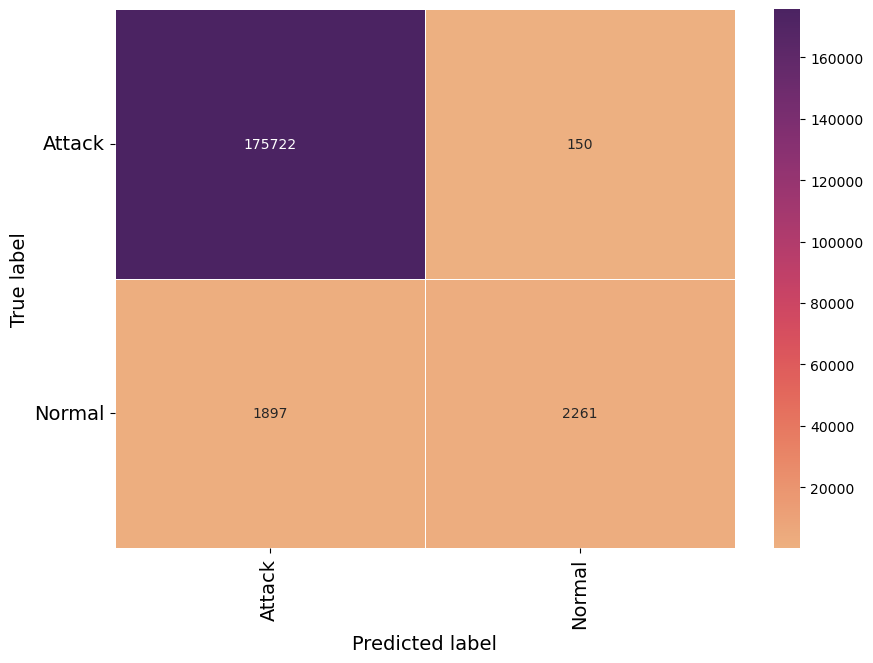



nf_bot_multi


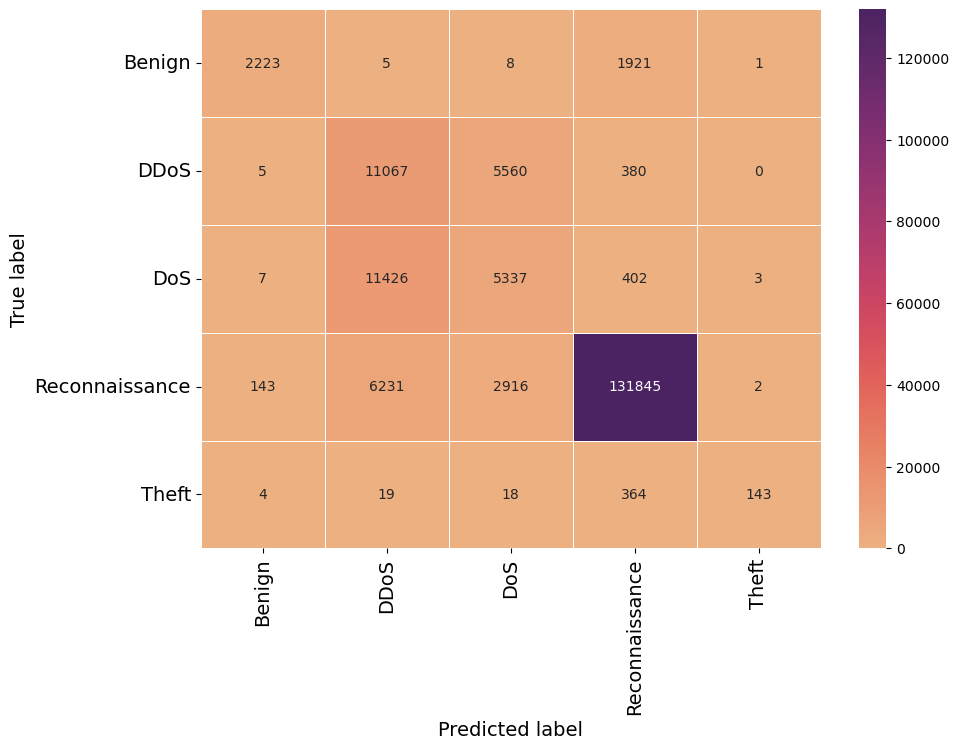



nf_ton_binary


/tmp/ipykernel_1275812/2359972098.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
/tmp/ipykernel_1275812/2359972098.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})


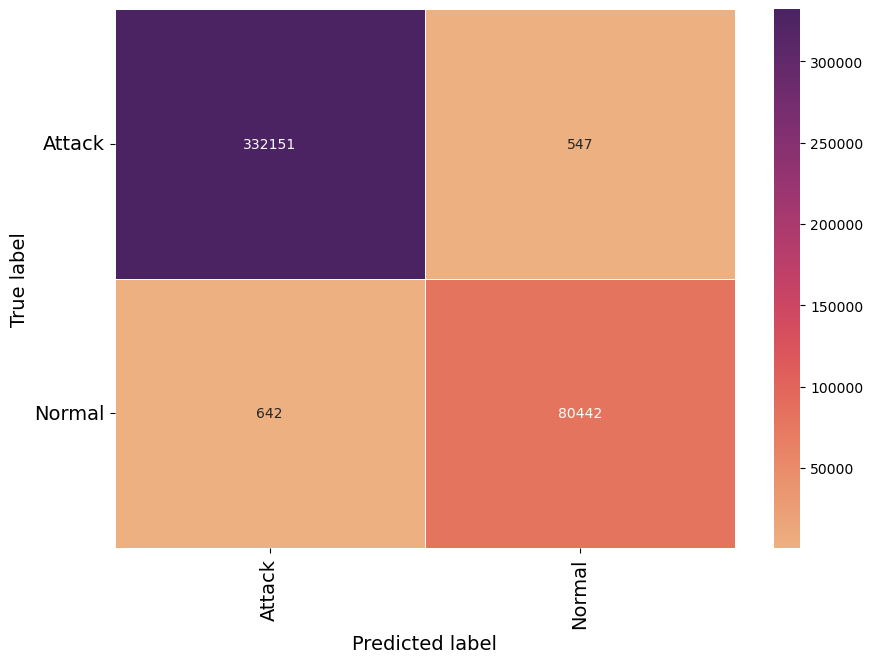



nf_ton_multi


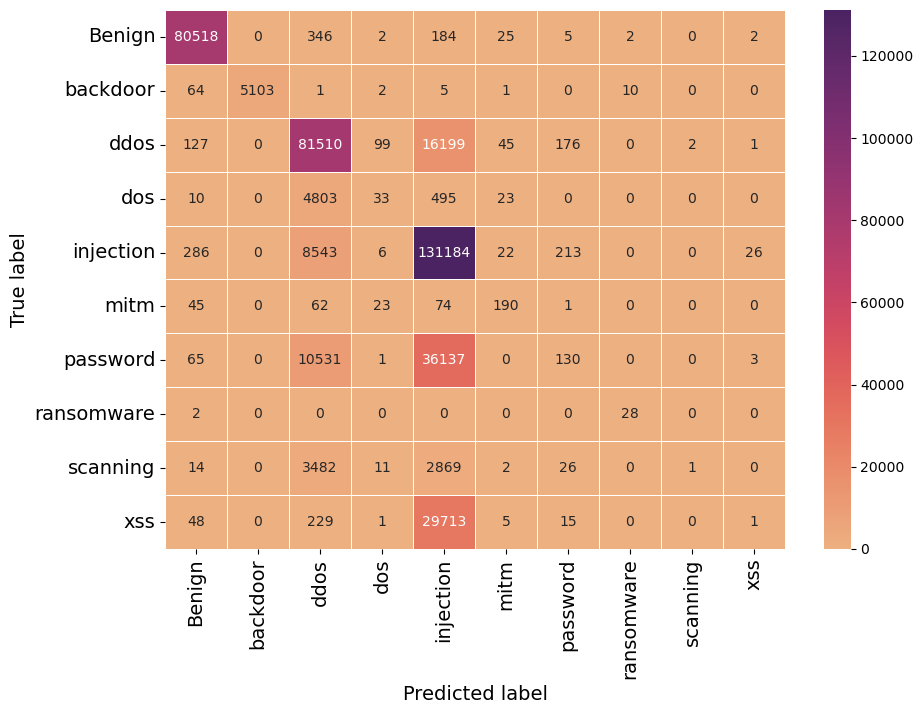



EGraphSAGE
nf_bot_binary


/tmp/ipykernel_1275812/2359972098.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
/tmp/ipykernel_1275812/2359972098.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})


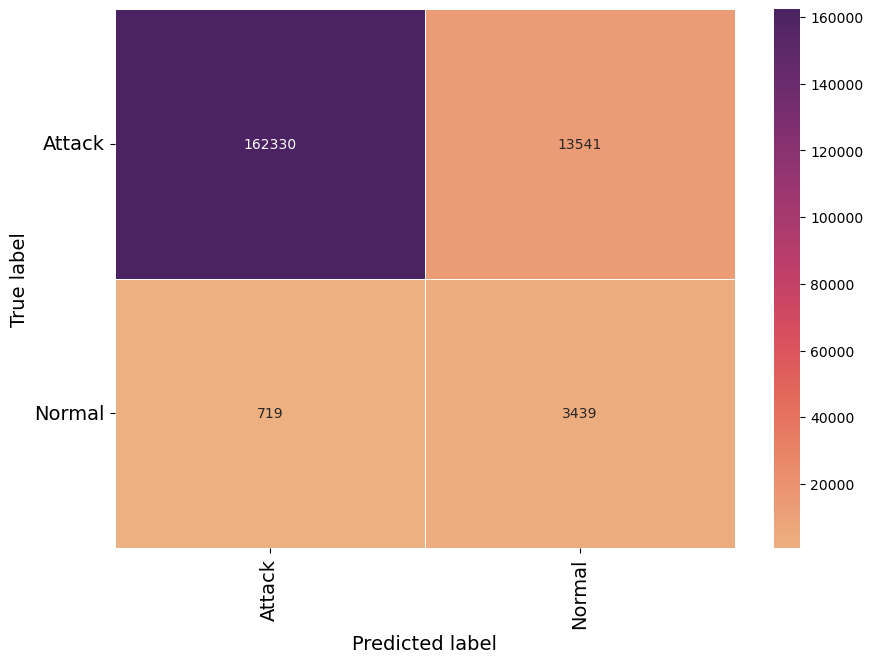



nf_bot_multi


/home/hoang/miniconda2/envs/iot/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


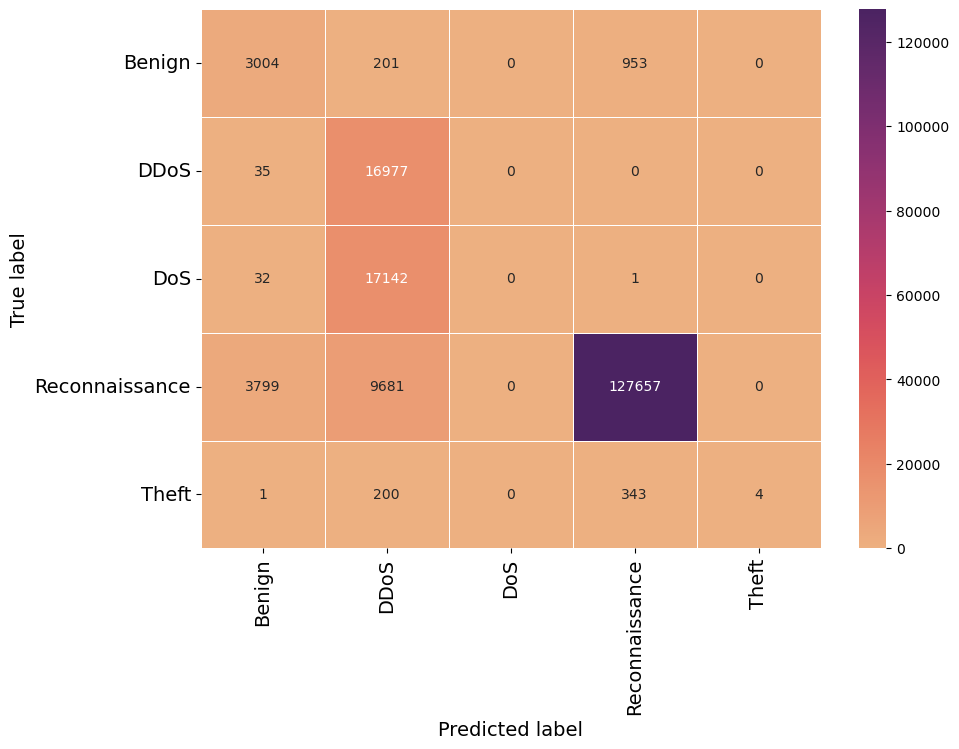



nf_ton_binary


/tmp/ipykernel_1275812/2359972098.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
/tmp/ipykernel_1275812/2359972098.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})


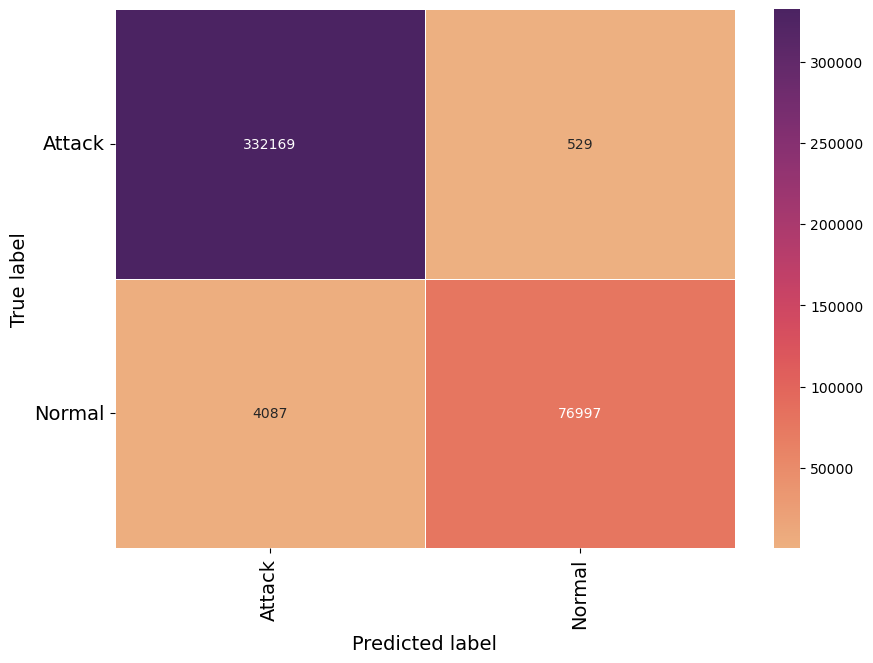



nf_ton_multi


/home/hoang/miniconda2/envs/iot/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


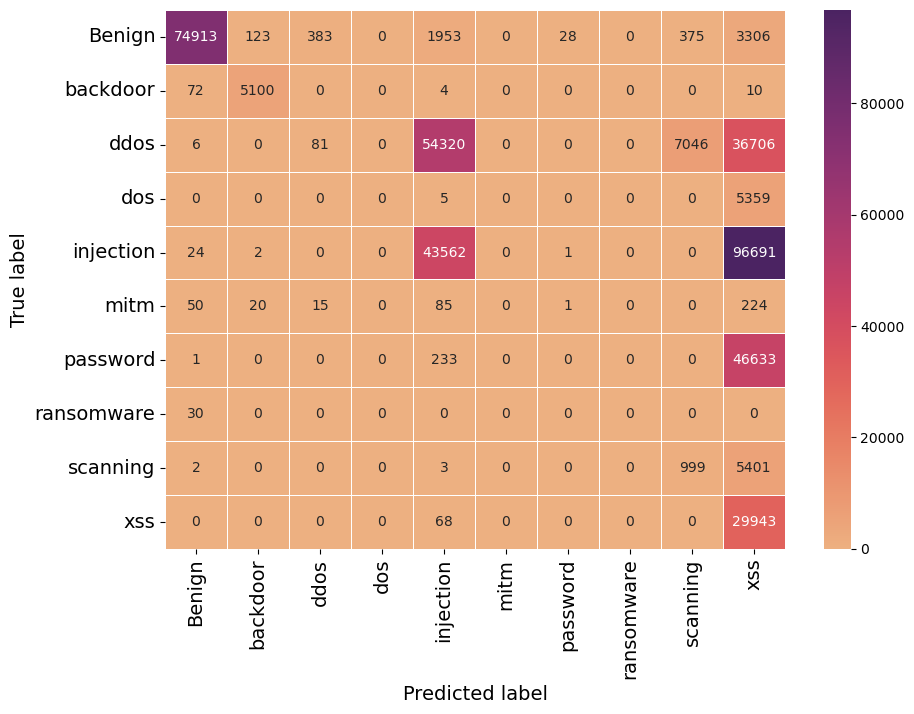



tsids
nf_bot_binary


/tmp/ipykernel_1275812/2359972098.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
/tmp/ipykernel_1275812/2359972098.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})


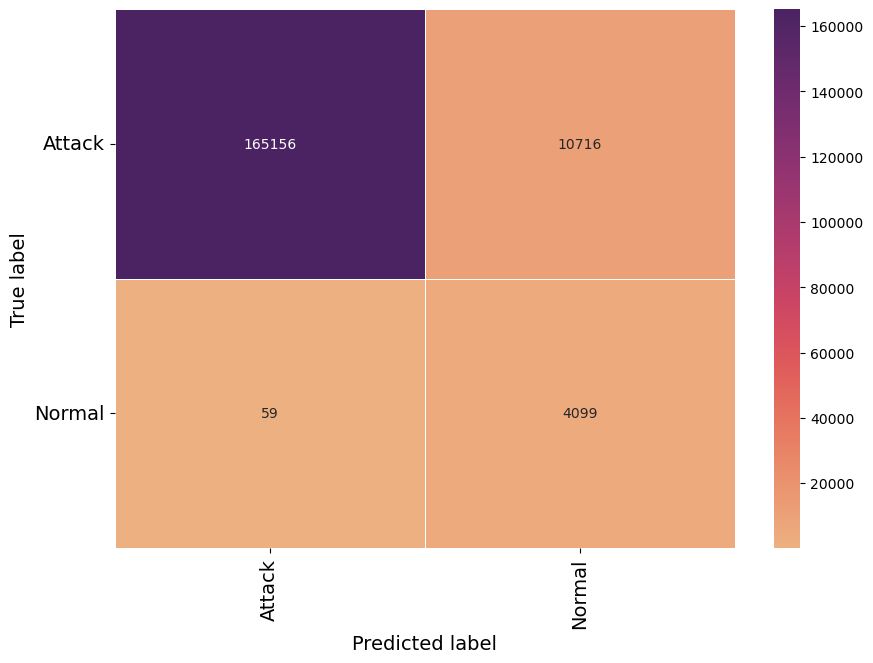



nf_bot_multi


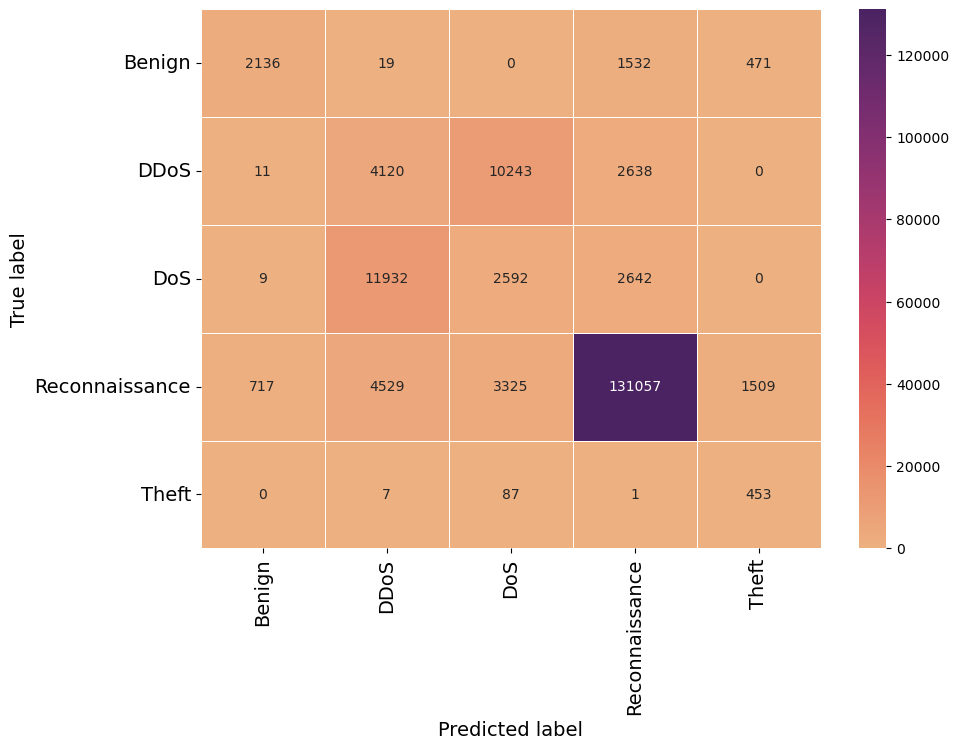



nf_ton_binary


/tmp/ipykernel_1275812/2359972098.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
/tmp/ipykernel_1275812/2359972098.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})


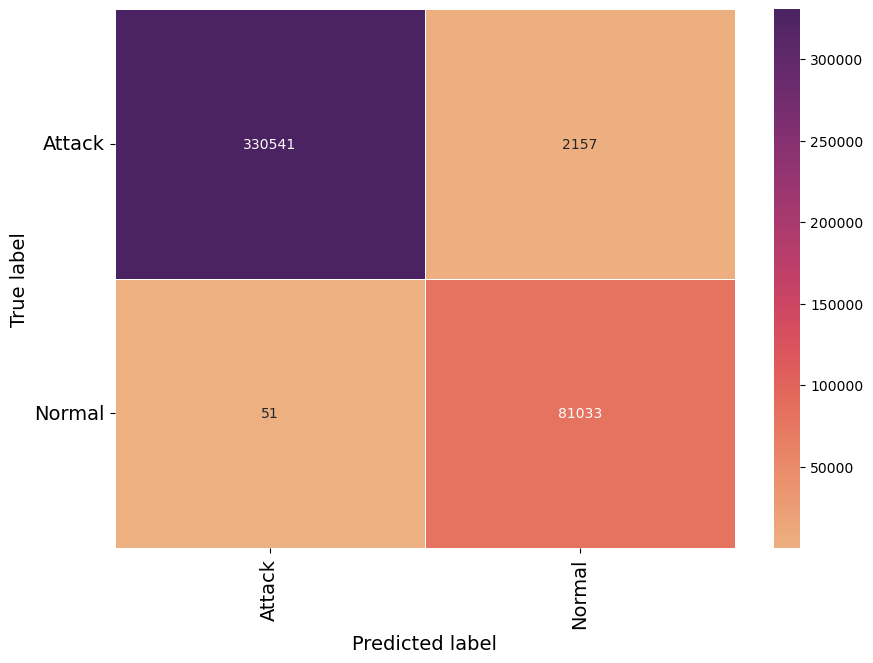



nf_ton_multi


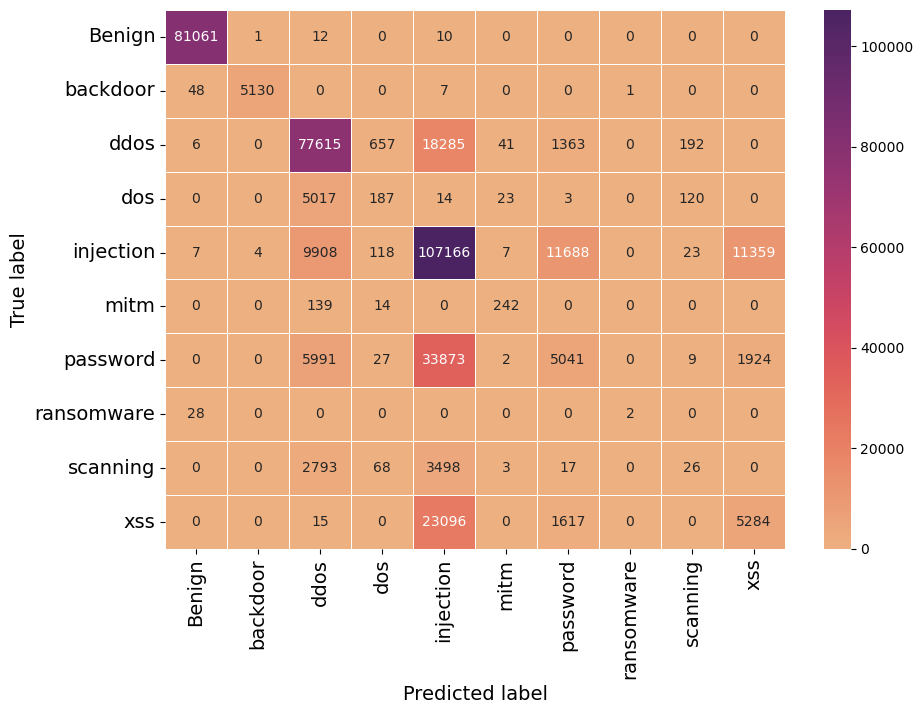

In [3]:
datasets = {
    'nf_bot_binary': 'NF-BoT-IoT_graph_binary',
    'nf_bot_multi': 'NF-BoT-IoT_graph_multi',
    'nf_ton_binary': 'NF-ToN-IoT_graph_binary',
    'nf_ton_multi': 'NF-ToN-IoT_graph_multi',
}
models = ['xgb', 'EGraphSAGE', 'tsids']
results = []
cm_matrices = []
for model in models:
    print(model)
    for ds, f_ds in datasets.items():
        print(ds)
        pred_path = f'../output/{model}_{ds}.csv'
        ds_file = f'../datasets/{f_ds}.pkl'
        df = read_output(ds_file, pred_path)
        df_test = df[df['tvt']=='test']
        gts = df_test['gts'].values
        preds = df_test['pred'].values
        probs_cnames = [c for c in df_test.columns if c.startswith('probs_')]
        if len(probs_cnames) == 2:
            probs = df_test['probs_1']
            df_test['True label'] = df_test['True label'].map({0: 'Normal', 1: 'Attack'})
            df_test['Predicted label'] = df_test['Predicted label'].map({0: 'Normal', 1: 'Attack'})
            binary = True
        else:
            probs = df_test[probs_cnames].values
            binary = False

        result = calc_eval(gts, preds, binary)
        result = [model, ds] + list(result)
        plot_confusion_matrix(df_test)
        results.append(result)
        print('\n')

In [4]:
df_test.head()

,probs_0,probs_1,probs_2,probs_3,probs_4,probs_5,probs_6,probs_7,probs_8,probs_9,gts,tvt,pred,True label,Predicted label
965492,0.999999,6.690505e-07,1.761817e-07,1.049084e-12,9.942766e-08,1.972305e-10,5.930037e-11,2.473688e-10,5.620965e-13,1.666818e-12,0,test,0,Benign,Benign
965493,0.999998,4.717295e-07,7.425510e-07,1.937880e-11,6.283728e-07,1.313233e-10,2.750102e-09,6.172096e-10,1.906927e-11,1.647927e-10,0,test,0,Benign,Benign
965494,0.999999,1.627700e-07,4.096476e-07,7.010169e-12,3.706212e-07,6.269128e-11,1.037231e-09,2.530814e-10,7.015024e-12,5.395222e-11,0,test,0,Benign,Benign
965495,0.000018,1.719755e-05,4.075264e-01,4.651317e-01,1.090040e-01,3.099994e-05,1.657029e-02,5.054561e-10,1.700621e-03,7.820901e-07,2,test,3,ddos,dos
965496,0.000511,2.408629e-05,4.708380e-01,3.555706e-01,7.901640e-02,1.717784e-02,7.798906e-03,4.195798e-07,6.814640e-02,9.166246e-04,8,test,2,scanning,ddos


In [5]:
df_baseline = pd.DataFrame(results)
df_baseline.columns = [
    'model', 'dataset', 'acc', 'auc', 
    'precision_macro', 'precision_micro', 
    'recall_macro', 'recall_micro', 'f1_macro', 'f1_micro',
]
df_baseline.sort_values('dataset').round(4).T

,0,4,8,1,5,9,2,6,10,3,7,11
model,xgb,EGraphSAGE,tsids,xgb,EGraphSAGE,tsids,xgb,EGraphSAGE,tsids,xgb,EGraphSAGE,tsids
dataset,nf_bot_binary,nf_bot_binary,nf_bot_binary,nf_bot_multi,nf_bot_multi,nf_bot_multi,nf_ton_binary,nf_ton_binary,nf_ton_binary,nf_ton_multi,nf_ton_multi,nf_ton_multi
acc,0.9886,0.9208,0.9401,0.8366,0.8201,0.7796,0.9971,0.9888,0.9947,0.7219,0.3736,0.6809
auc,0.7715,0.875,0.9624,0.9331,0.8857,0.895,0.9952,0.974,0.9964,0.94,0.8627,0.9573
precision_macro,0.9636,0.5991,0.6382,0.7282,0.5622,0.4479,0.9957,0.9905,0.987,0.5427,0.2826,0.5552
precision_micro,0.9886,0.9208,0.9401,0.8366,0.8201,0.7796,0.9971,0.9888,0.9947,0.7219,0.3736,0.6809
recall_macro,0.7715,0.875,0.9624,0.5382,0.5264,0.5324,0.9952,0.974,0.9964,0.5166,0.3372,0.4545
recall_micro,0.9886,0.9208,0.9401,0.8366,0.8201,0.7796,0.9971,0.9888,0.9947,0.7219,0.3736,0.6809
f1_macro,0.8413,0.6417,0.7002,0.5746,0.4118,0.445,0.9954,0.982,0.9916,0.4859,0.2671,0.4663
f1_micro,0.9886,0.9208,0.9401,0.8366,0.8201,0.7796,0.9971,0.9888,0.9947,0.7219,0.3736,0.6809


In [5]:
# results = []
# paths = glob.glob('../output/model=*.csv')
# for p in paths:
#     print(p)
#     print(ds)
#     ds = p.split('/')[-1].split('gat')[-1].split('epoch')[0][1:-1]
#     ds_file = datasets[ds]
#     pred_path = p
#     ds_file = f'../datasets/{f_ds}.pkl'
#     df = read_output(ds_file, pred_path)
#     df_test = df[df['tvt']=='test']
#     gts = df_test['gts'].values
#     preds = df_test['pred'].values
#     probs_cnames = [c for c in df_test.columns if c.startswith('probs_')]
#     if len(probs_cnames) == 2:
#         probs = df_test['probs_1']
#         binary = True
#     else:
#         probs = df_test[probs_cnames].values
#         binary = False

#     result = calc_eval(gts, preds, binary)
#     result = [model, ds, p] + list(result)
#     plot_confusion_matrix(df_test)
#     results.append(result)
#     print('\n')

In [6]:
# df = pd.DataFrame(results)
# df.columns = [
#     'model', 'dataset', 'p', 'acc', 'auc', 
#     'precision_macro', 'precision_micro', 
#     'recall_macro', 'recall_micro', 'f1_macro', 'f1_micro',
# ]

In [8]:
# paths = glob.glob('../model/model=gat_nf_bot*')
# for p in paths:
#     p = p.split('/')[-1]
#     print(f'python ../src/predict.py --name nf_bot_multi --restore_model_name {p}')